<table align="left">
  <td>
    <a href="https://is.gd/Mv3FTa" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

 # Estudio Comparativo de Modelos de Clasificación para la Predicción de Rotación de Clientes en Bancos

 - Regresion Logística - Softmax
 - Árboles de Decisión
 - Support Vector Machine

## Introducción
En este estudio se comparan los modelos de clasificación de Regresión Logística, Árboles de Decisión y Support Vector Machine para la predicción de rotación de clientes en bancos. El conjunto de datos utilizado es el [Bank Churn Prediction](https://www.kaggle.com/datasets/shubh0799/churn-modelling). El objetivo de este estudio es comparar los modelos de clasificación en términos de precisión, exactitud, sensibilidad y especificidad.

EL estudio utiliza los datos de los clientes de un banco para construir un modelo predictivo de los clientes que podrían abandonar la entidad. Como sabemos, es mucho más caro captar un nuevo cliente que mantener uno existente. Es ventajoso para los bancos saber qué lleva a los clientes a abandonar la empresa.

## Metodología
- El conjunto de datos contiene 10000 observaciones y 14 variables. El conjunto de datos se divide en un conjunto de entrenamiento y un conjunto de prueba. 
- El conjunto de entrenamiento se utiliza para entrenar los modelos de clasificación y el conjunto de prueba se utiliza para evaluar los modelos de clasificación. 
- Los modelos de clasificación se entrenan utilizando el conjunto de entrenamiento y se evalúan utilizando el conjunto de prueba.
- Se realizan cuatro experimentos con diferentes configuraciones de datos:
    - **Experimento 1**: Se utiliza el conjunto de datos original eliminando las variables que no son significativas para la predicción de la rotación de clientes y se codifican las variables categóricas.
    - **Experimento 2**: Se utiliza el conjunto de datos original eliminando las variables que no son significativas para la predicción de la rotación de clientes, se codifican las variables categóricas y se estandarizan las variables numéricas.
    - **Experimento 3**: Se utiliza el conjunto de datos original eliminando las variables que no son significativas para la predicción de la rotación de clientes, se codifican las variables categóricas, se estandarizan las variables numéricas y se utiliza la técnica de sobremuestreo SMOTE para equilibrar las clases.
    - **Experimento 4**: Se utiliza el conjunto de datos original eliminando las variables que no son significativas para la predicción de la rotación de clientes, se codifican las variables categóricas, se estandarizan las variables numéricas y se utiliza la técnica de sobremuestreo SMOTE para equilibrar las clases. Además, se utiliza la técnica GridSearchCV para encontrar los mejores hiperparámetros para cada modelo de clasificación.
        
- Los modelos de clasificación se evalúan utilizando las métricas de precisión, exactitud, sensibilidad y especificidad. 
    - La precisión es la proporción de predicciones correctas. 
    - La exactitud es la proporción de predicciones correctas para la clase positiva. 
    - La sensibilidad es la proporción de verdaderos positivos. 
    - La especificidad es la proporción de verdaderos negativos. 
- Los modelos de clasificación se comparan en términos de precisión, exactitud, sensibilidad y especificidad.
    



In [85]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('axes', titlesize=10)

# to make this notebook's output stable across runs
np.random.seed(42)
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Importar y Preparar los Datos

Etapa de importación y preprocesamiento de los datos. 
- Se utilizará pandas para crear un dataframe que contenga los datos. 
- Se observará la forma de los datos y se verificará si hay valores nulos.
- Se eliminarán atributos que no se utilizarán en el estudio.
- Se estandarizarán las variables numéricas.
- Se codificarán las variables categóricas según el tipo (nominales - ordinales).
- Se separarán los datos en atributos y etiquetas.
- Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba.


In [86]:
datos = pd.read_csv("../Regresion-Clasificación/Churn_Modelling.csv")
datos.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [88]:
datos.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

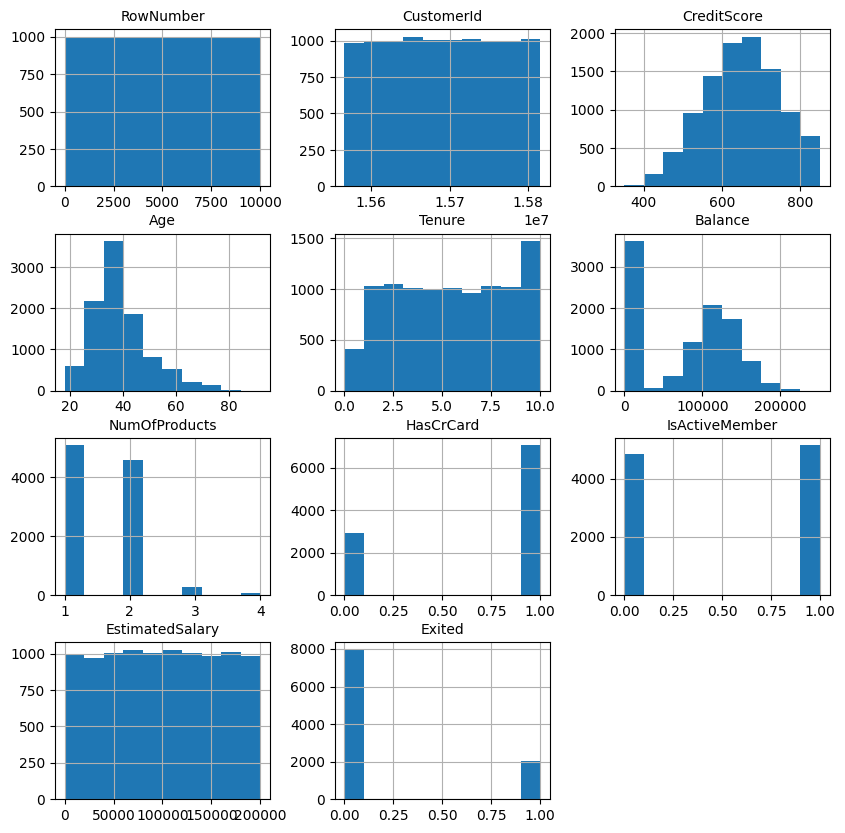

In [89]:
datos.hist(figsize=(10,10))
plt.show()

In [90]:
datos.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Visualización de los datos


In [91]:
feature_list = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

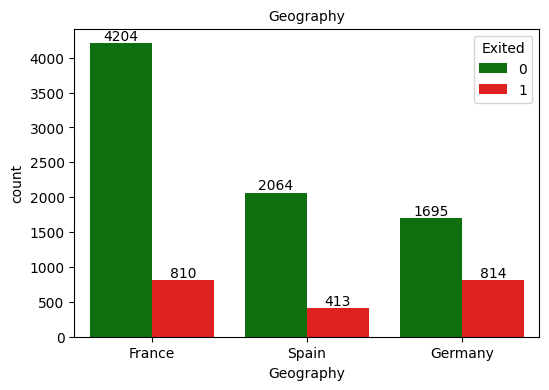

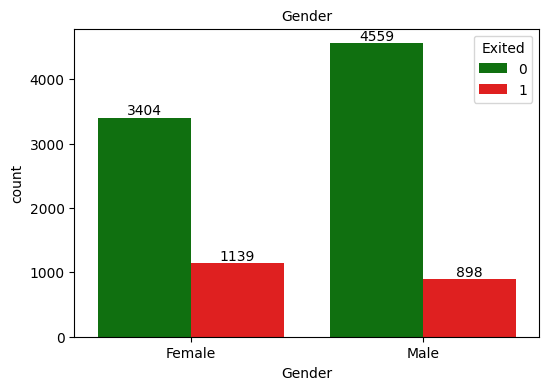

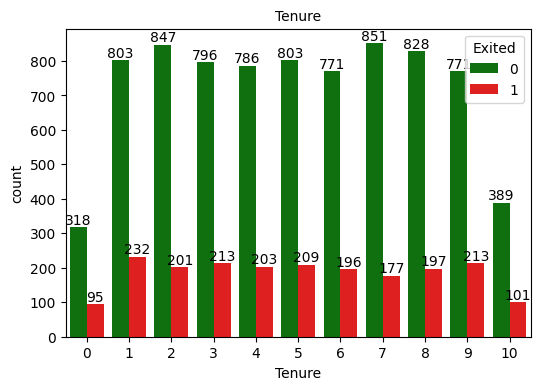

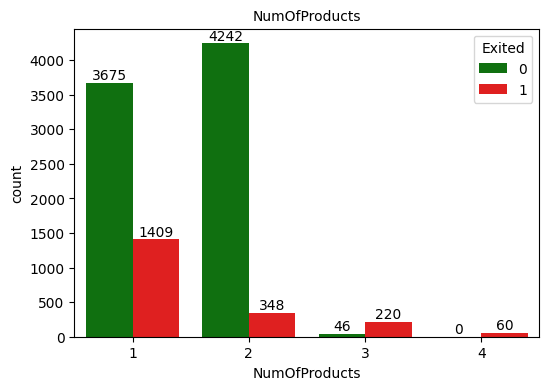

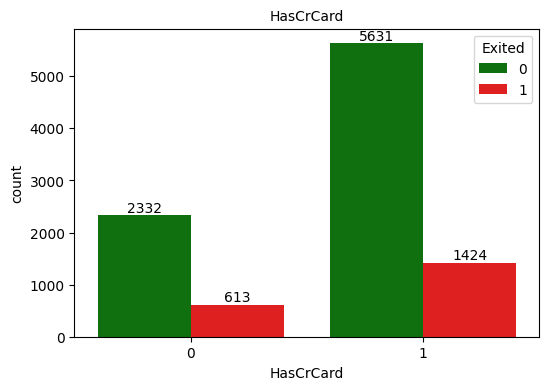

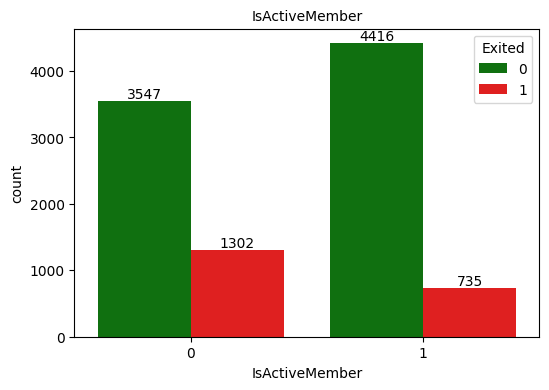

In [92]:
for feature in feature_list:
    plt.figure(figsize=(6,4))
    plt.title(feature)
    ax=sns.countplot(x=feature, hue='Exited', data=datos, palette=['green', 'red'])
    
    for container in ax.containers:
        ax.bar_label(container)

[Text(0, 0, '7963'), Text(0, 0, '2037')]

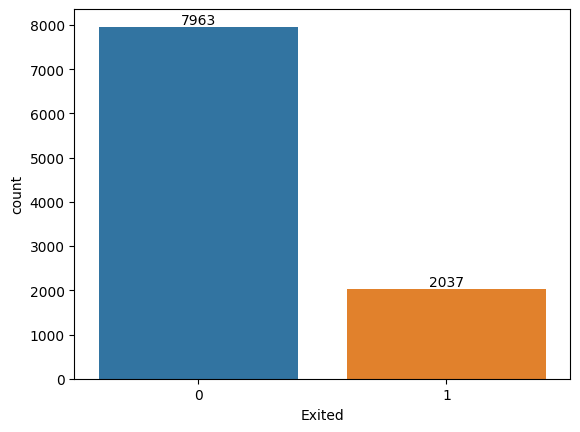

In [93]:
# Clase objetivo Exited (1: Churn, 0: No Churn)
ax=sns.countplot(data=datos, x='Exited')
ax.bar_label(container=ax.containers[0], labels=datos['Exited'].value_counts())

### 1.1 Conclusiones obtenidas de la etapa de exploración de los datos

- Se observa que no hay valores nulos en el conjunto de datos.
- Se observa que hay 14 variables y 10000 observaciones.
- Se observa que hay 11 variables numéricas y 3 variables categóricas.
- Se observa que hay 3 variables categóricas.
- Se observa que la clase objetivo Exited tiene 2 valores (0 y 1).
- Se observa que hay un desbalance en la clase objetivo Exited. Hay 7963 observaciones de la clase 0 y 2037 observaciones de la clase 1.
- Se observa que los atributos RowNumber, CustomerId y Surname no aportan información relevante para el estudio. **Se eliminarán estos atributos**.
- Se observa que los atributos CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary tienen valores que varían en diferentes rangos. **Se estandarizarán estos atributos**.


### 1.2 Drop de los atributos que no se utilizarán en el estudio

In [94]:
# Seleccionar las variables que se van a utilizar como objetivo y atributos

# Exited = objetivo
y = datos.iloc[:, 13]

# Drop RowNumber, CustomerId, Surname, Exited
X = datos.drop(['RowNumber', 'CustomerId', 'Surname', "Exited"], axis=1)


X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### 1.3 Codificación de las variables categóricas
Se utilizará la codificación One-Hot para las variables categóricas Gender y Geography.


In [95]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
X_ohe = ohe.fit_transform(X[["Geography", "Gender"]])
ohe.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [96]:
X_ohe = pd.DataFrame(X_ohe, columns = ohe.get_feature_names())
X_ohe.head()

,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


### 1.4 Estandarización de las variables numéricas

In [97]:
from matplotlib.pyplot import axis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(["Geography", "Gender"], axis=1))
X_scaled = pd.DataFrame(X_scaled, columns = X.drop(["Geography", "Gender"], axis=1).columns)
X_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


### 1.5 Unión de los datos codificados y estandarizados

In [98]:
df_X_P2 = pd.concat([X_scaled, X_ohe], axis=1)
df_X_P2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.0,0.0,1.0,1.0,0.0


### 1.6 Creación de datasets con atributos codificados y no estandarizados

In [99]:
X_no_scaled = pd.DataFrame(X, columns = X.drop(["Geography", "Gender"], axis=1).columns)

df_X_P1 = pd.concat([X_no_scaled, X_ohe], axis=1)
df_X_P1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0


## 2. Funciones para entrenamiento y evaluación de los modelos de clasificación

### 2.1 Función para evaluar el desempaño de los modelos de clasificación

- Confusion Matrix:
- Classification Report:
- Cohen Kappa Score:
- AUROC Score: 


In [100]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score, accuracy_score  
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,precision_score,recall_score  

In [101]:
def performanceCal(ytest, ypredict):
  """
    Calculation of performance metrics:
    - Confusion Matrix:
    - Accuracy Score: https://is.gd/YwoQJf
    - Precision Score: https://is.gd/Xz6Nu0
    - F1-Score: https://is.gd/YVGWCs
    - Recall Score: https://is.gd/9PUCgT 
    - Cohen Kappa Score:
    - AUROC Score: https://is.gd/JIAktb
    Arguments:
        ytest: ndarray - list
        ypredict: ndarray - list
    Returns:
        List with result of performance metrics: matrixconfu,accuracyscore,
        precisionscore,f1score,recallscore,cohenkappa,auroc_score
    """

  matrixconfu  = confusion_matrix(ytest, ypredict)
  matrixreport = classification_report(ytest, ypredict)
  
  accuracyscore = round(accuracy_score(ytest, ypredict),3)
  f1score = round(f1_score(ytest, ypredict, average='weighted'),3)
  precisionscore = round(precision_score(ytest, ypredict, average='weighted'),3)
  recallscore = round(recall_score(ytest, ypredict, average='weighted'),3)
  

  cohenkappa= round(cohen_kappa_score(ytest, ypredict),3)
  auroc_score = round(roc_auc_score(ytest, ypredict),3)


  result = [matrixconfu,matrixreport,accuracyscore,precisionscore,f1score,recallscore,cohenkappa,auroc_score]
  return result

### 2.2 Función para entrenar los modelos de clasificación

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


from numpy import mean
from numpy import std

In [103]:
def modelClas(model,xtrain,ytrain,xtest):
  """
  Model Evaluation:

  Arguments:
      model: sklearn classifier model
      xtrain: ndarray - list
      ytrain: ndarray - list
      xtest: ndarray - list
  Returns:
      model predictions
  """
  model.fit(xtrain, ytrain)
  model_predic = model.predict(xtest)


  return model_predic

In [104]:
def heatmapgraph(data):
  #1: Churn, 0: No Churn
  ax = sns.heatmap(data, annot=True, fmt='d',xticklabels=['No Churn','Churn'],
                 yticklabels=['No Churn','Churn'],cbar=False, cmap='Blues')
  ax.set_xlabel("Predicción")
  ax.set_ylabel("Real")

## 3.0 Entrenamiento y Evaluación de los Modelos de Clasificación

### 3.1 Experimento 1

 - Parametros utilizados en la configuración de los modelos de clasificación son los valores por defecto de la librería sklearn.
 - Se utilizará la clase objetivo sin balancear.
 - Se utilizará el conjunto de datos sin estandarizar.

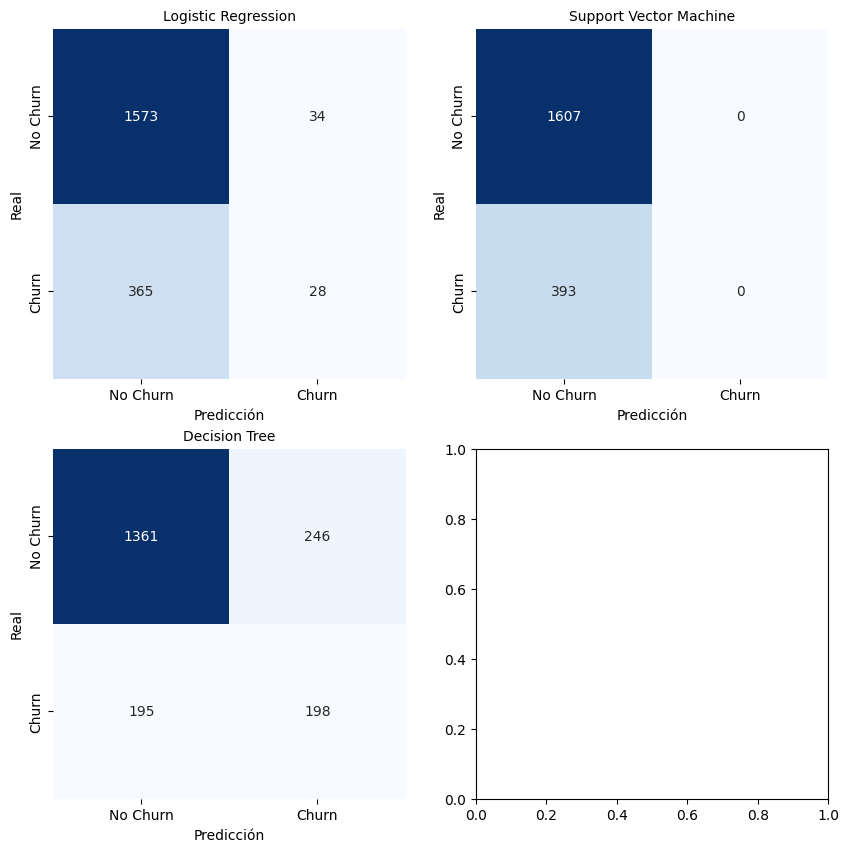

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_X_P1, y, test_size=0.2, random_state=42)

modelLR_1 = LogisticRegression()
modelSVC_1 = SVC()
modelDTC_1 = DecisionTreeClassifier(random_state=0)

models=[modelLR_1,modelSVC_1,modelDTC_1]
plt.subplots(2,2,figsize=(10,10))
modelsNames = ["Logistic Regression","Support Vector Machine", "Decision Tree"]
metricsResults = []

for idx, model in enumerate(models):
  modelResults = modelClas(model,X_train,y_train,X_test)
  metrics = performanceCal(y_test,modelResults)
  
  metrics.insert(2,modelsNames[idx])
  metricsResults.append(metrics[2:])
  
  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])

In [106]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2]]
  
#define header names
col_names = ["Models", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC1_Results = pd.DataFrame(data=data, columns=col_names)
MC1_Results

,Models,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.800,0.741,0.737,0.800,0.073,0.525
1,Support Vector Machine,0.804,0.646,0.716,0.804,0.000,0.500
2,Decision Tree,0.780,0.790,0.784,0.780,0.334,0.675


### 3.1.1 Conclusiones Experimento 1

- El uso de un set de datos en el cual no se ha estandarizado las variables numéricas, no es recomendable para el entrenamiento de los modelos de clasificación.
- Se observa en la matriz de confusión que tanto regresión logistica como SVM tienen un desempeño similar, identificando mayormente a los clientes que no abandonaron el banco. Pero tienen bajo rendimiento para identificar a los clientes que abandonaron el banco. AUC ROC Score es de 0.5 para ambos modelos.

"Cuando el AUC es aproximadamente 0,5, el modelo no tiene capacidad de discriminación para distinguir entre la clase positiva y la negativa." [Ref](https://is.gd/ItJvjg)

![AUC ROC Score](https://miro.medium.com/max/640/1*iLW_BrJZRI0UZSflfMrmZQ.png)
 
- El modelo de clasificación que mejor desempeño tuvo fue el modelo de clasificación de **árboles de decisión**.
    - El modelo de **árboles de decisión** tuvo un desempeño de **0.79** en la métrica de precisión, es decir, identificó correctamente el **79%** de los clientes que abandonaron el banco.
    - Se observa que el AUC ROC Score es de 0.675, lo que indica que el modelo tiene un desempeño aceptable (68% de posibilidades) para identificar a los clientes que abandonaron el banco.



### 3.2 Experimento 2

 - Parametros utilizados en la configuración de los modelos de clasificación son los valores por defecto de la librería sklearn.
 - Se utilizará la clase objetivo sin balancear.
 - Se utilizará el conjunto de datos estandarizado.

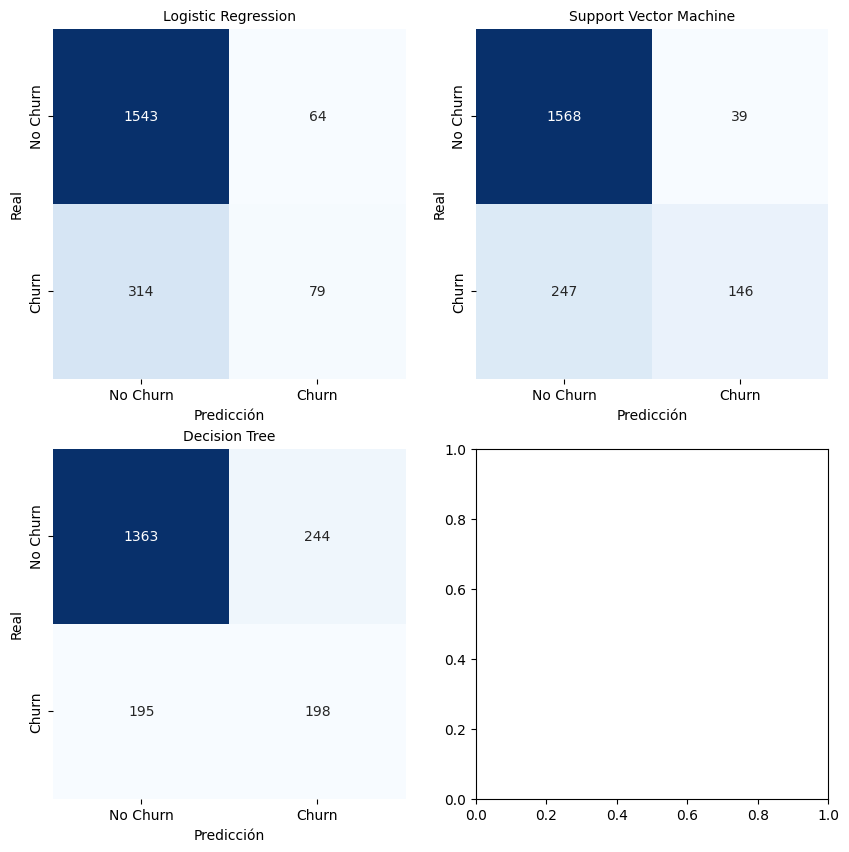

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_X_P2, y, test_size=0.2, random_state=42)

modelLR_2 = LogisticRegression()
modelSVC_2 = SVC()
modelDTC_2 = DecisionTreeClassifier(random_state=0)

models=[modelLR_2,modelSVC_2,modelDTC_2]
plt.subplots(2,2,figsize=(10,10))
modelsNames = ["Logistic Regression","Support Vector Machine", "Decision Tree"]
metricsResults = []

for idx, model in enumerate(models):
  modelResults = modelClas(model,X_train,y_train,X_test)
  metrics = performanceCal(y_test,modelResults)
  
  metrics.insert(2,modelsNames[idx])
  metricsResults.append(metrics[2:])
  
  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])

In [108]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2]]
  
#define header names
col_names = ["Models", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC2_Results = pd.DataFrame(data=data, columns=col_names)
MC2_Results

,Models,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.811,0.776,0.774,0.811,0.212,0.581
1,Support Vector Machine,0.857,0.849,0.836,0.857,0.434,0.674
2,Decision Tree,0.780,0.791,0.785,0.780,0.336,0.676


### 3.2.2 Conclusiones Experimento 2

- Se observa que la estandarización de los datos tuvo un impacto positivo en el desempeño de los modelos de clasificación.
- Se observa en la matriz de confusión que tanto regresión logistica como SVM presentan un mejor rendimiento para identificar a los clientes que abandonaron el banco en comparación con el experimento 1. AUC ROC Score incrementa para ambos modelos. Siendo que los modelos SVM y Arboles de decisión tienen un desempeño similar.
- De forma general se observa que el modelo SVM clasifica mejor a los clientes que no abandonaron el banco. Pero tiene un desempeño aceptable para identificar a los clientes que abandonaron el banco.
- El modelo que mejor logra identificar a los clientes que abandonaron el banco es el modelo de **árboles de decisión**.
    - El modelo de **árboles de decisión** tuvo un desempeño de **0.79** en la métrica de precisión, es decir, identificó correctamente el **79%** de los clientes que abandonaron el banco.
- EL modelo SVM presenta el mejor desempeño al observar las metricas de Accuracy, Precision, Recall y F1 Score. Sin embargo, el modelo SVM presenta un desempeño aceptable para identificar a los clientes que abandonaron el banco.

### 3.3 Experimento 3

 - Parametros utilizados en la configuración de los modelos de clasificación son los valores por defecto de la librería sklearn.
 - Se utilizará la clase objetivo balanceada.
 - Se utilizará el conjunto de datos estandarizado.

#### Smote Algorithm - OverSampling

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![Smote](https://miro.medium.com/max/734/1*yRumRhn89acByodBz0H7oA.png)

In [109]:
#balancing the dataset
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(df_X_P2, y, test_size=0.2, random_state=42)

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


<AxesSubplot: xlabel='Exited', ylabel='count'>

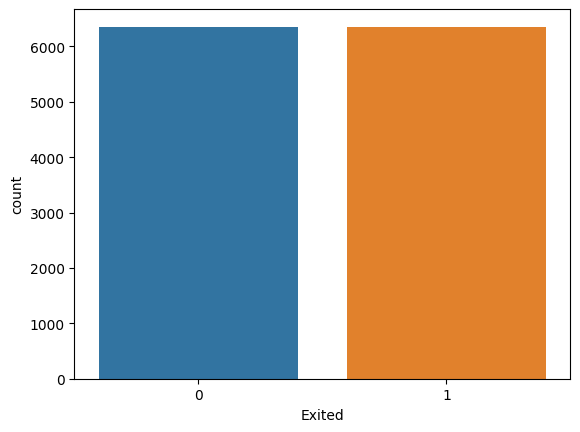

In [110]:
sns.countplot(x=y_train_smote)

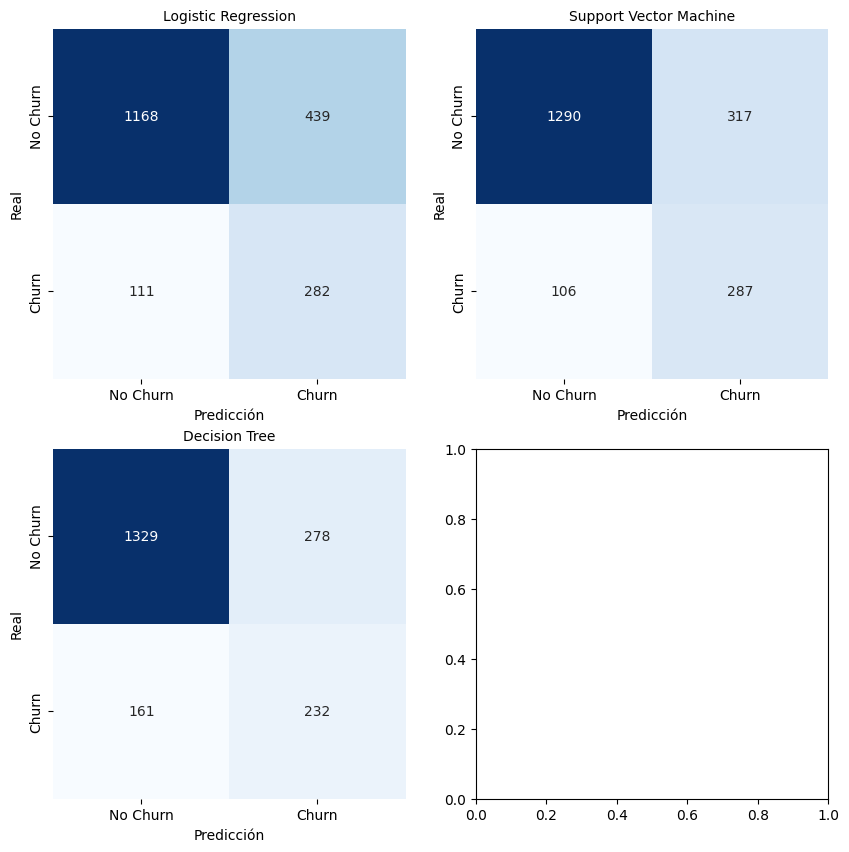

In [111]:

modelLR_3 = LogisticRegression()
modelSVC_3 = SVC()
modelDTC_3 = DecisionTreeClassifier(random_state=0)

models=[modelLR_3,modelSVC_3,modelDTC_3]
plt.subplots(2,2,figsize=(10,10))
modelsNames = ["Logistic Regression","Support Vector Machine", "Decision Tree"]
metricsResults = []

for idx, model in enumerate(models):
  modelResults = modelClas(model,X_train_smote,y_train_smote,X_test)
  metrics = performanceCal(y_test,modelResults)
  
  metrics.insert(2,modelsNames[idx])
  metricsResults.append(metrics[2:])
  
  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])

In [112]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2]]
  
#define header names
col_names = ["Models", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC3_Results = pd.DataFrame(data=data, columns=col_names)
MC3_Results

,Models,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.725,0.811,0.750,0.725,0.338,0.722
1,Support Vector Machine,0.788,0.836,0.803,0.788,0.443,0.767
2,Decision Tree,0.780,0.806,0.791,0.780,0.375,0.709


## 4.0 Optimización de los Parametros de los Modelos de Clasificación

Para proceder con el 4 experimento se utilizará grid search para optimizar los parametros de los modelos de clasificación.

### 4.1 Tunning

 - Se utilizará la clase objetivo balanceada.
 - Se utilizará el conjunto de datos estandarizado.
 - Se utilizará grid search para optimizar los parametros de los modelos de clasificación.


### Logistic Regresion Tunning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2', "elasticnet"], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "saga"],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   refit = True,              # fit using best hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10,                     # number of folds
                   n_jobs=6)                  # number of processors to use              
clf.fit(X_train_smote,y_train_smote)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)
print(clf.best_estimator_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Accuracy : 0.7104336455720004
LogisticRegression(C=0.01, penalty='l1', solver='saga')


### Support Vector Machine Tunning

In [82]:
# defining parameter range
param_grid = {'C': [1, 10, 100],
			'kernel': ['rbf', "poly", "sigmoid"]}

grid = GridSearchCV(SVC(), param_grid, 
					refit = True, # fit using best hyperparameters
					scoring='accuracy', # metric for scoring 
					verbose=3,# verbose: the higher, the more messages
					cv=10,    # number of folds
					n_jobs=6) # n_jobs=6 for using 6 processors

# fitting the model for grid search
grid.fit(X_train_smote,y_train_smote)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


### Decision Tree Tunning

In [81]:
# defining parameter range
param_grid = {'max_leaf_nodes': list(range(2, 100)),'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                    param_grid, # hyperparameters
                    refit = True, # fit using best hyperparameters
                    scoring='accuracy', # metric for scoring
                    verbose=2 , # verbose: the higher, the more messages
                    cv=10, # number of folds
                    n_jobs=6) # n_jobs=6 for using 6 processors

# fitting the model for grid search
grid.fit(X_train_smote,y_train_smote)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits
{'max_leaf_nodes': 99, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)


### 4.2 Experimento 4

 - Se utilizará la clase objetivo balanceada.
 - Se utilizará el conjunto de datos estandarizado.
 - Se utilizarán los parametros optimizados de los modelos de clasificación.

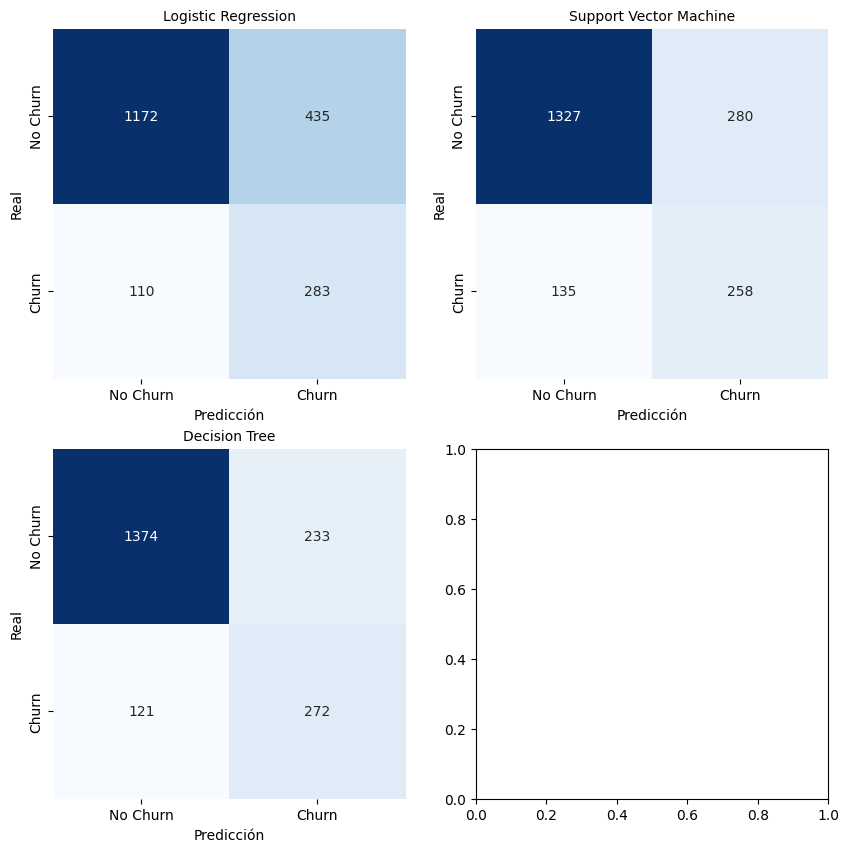

In [119]:
modelLR_4 = LogisticRegression(C=0.01, penalty='l1', solver='saga')
modelSVC_4 = SVC(C=10, kernel='rbf')
modelDTC_4 = DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)

models=[modelLR_4,modelSVC_4,modelDTC_4]
plt.subplots(2,2,figsize=(10,10))
modelsNames = ["Logistic Regression","Support Vector Machine", "Decision Tree"]
metricsResults = []

for idx, model in enumerate(models):
  modelResults = modelClas(model,X_train_smote,y_train_smote,X_test)
  metrics = performanceCal(y_test,modelResults)
  
  metrics.insert(2,modelsNames[idx])
  metricsResults.append(metrics[2:])
  
  ax = plt.subplot(2,2,idx+1)
  ax.yaxis.set_ticklabels([])
  ax.set_title(modelsNames[idx])
  fig = heatmapgraph(metrics[0])

In [198]:
#create data
data = [metricsResults[0],metricsResults[1],metricsResults[2]]
  
#define header names
col_names = ["Models", "Accuracy", "Precision","Recall", "F1-Score", "Cohen Kappa Score", "AUC ROC Score" ]
  
#display table
MC4_Results = pd.DataFrame(data=data, columns=col_names)
MC4_Results

,Models,Accuracy,Precision,Recall,F1-Score,Cohen Kappa Score,AUC ROC Score
0,Logistic Regression,0.728,0.812,0.752,0.728,0.342,0.725
1,Support Vector Machine,0.792,0.824,0.804,0.792,0.423,0.741
2,Decision Tree,0.823,0.844,0.831,0.823,0.494,0.774


## 5.0 Conclusiones



### 5.1 Conclusiones Generales

- El estudio comparativo para clasificar a los clientes que abandonaran el banco mostró que:

    - La estandarización de los datos es un proceso que mejora el desempeño de los modelos de clasificación.
    - El modelo SVM se ve altamente afectado cuando no se realiza la estandarización de los datos.
    - El balanceo de la clase objetivo es un proceso que mejora el desempeño de los modelos de clasificación.
    - Aunque se tengan diferentes metricas de rendimiento es importante observar la matriz de confusión para identificar el desempeño de los modelos de clasificación. Adicionalmente conocer el problema que se está tratando de resolver para interpretar los resultados de las metricas de rendimiento.

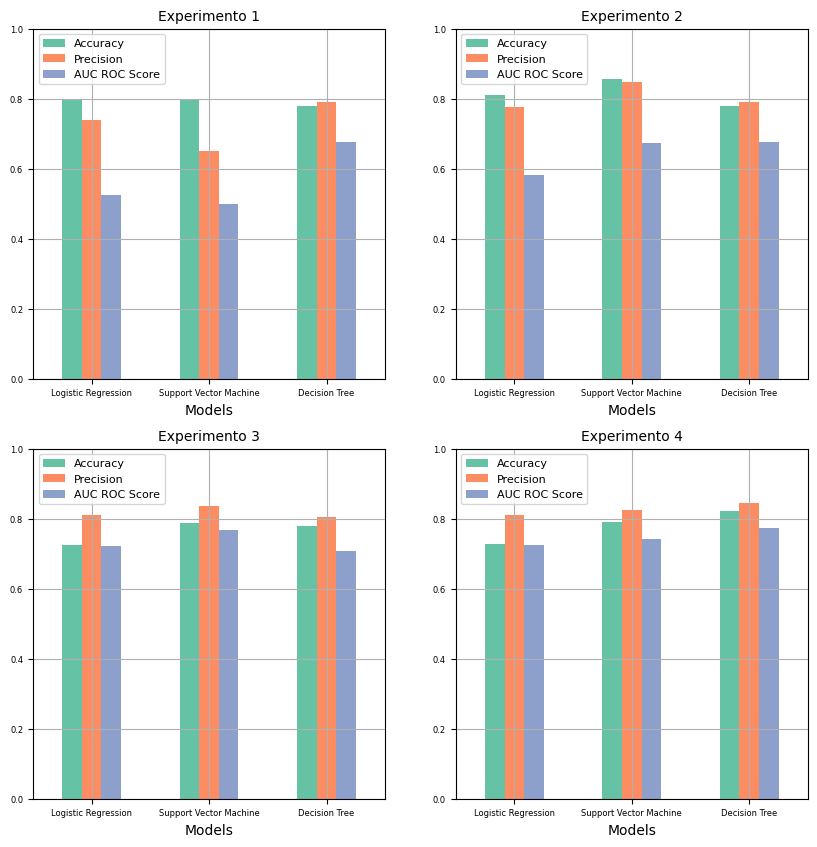

In [220]:
modelsResults = [MC1_Results,MC2_Results,MC3_Results,MC4_Results]
experimento = ["Experimento 1","Experimento 2","Experimento 3","Experimento 4"]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
axe = axes.ravel()
modelsNames = ["LR","SVM", "DT"]


colors={"Accuracy": "#66c2a5", "Precision": "#fc8d62", "AUC ROC Score": "#8da0cb"}
metricsPlot = ["Accuracy","Precision","AUC ROC Score"]
for idx, model in enumerate(modelsResults):
  axes=modelsResults[idx].plot(ax=axe[idx],kind='bar',x="Models", y=metricsPlot, title=experimento[idx] ,rot=0, fontsize=6,color=colors, grid=True,ylim=(0,1)).legend(loc=2,fontsize = 8)  
